<a href="https://colab.research.google.com/github/AntoniSopka97/ML_Magic_data/blob/main/MashineLearning_MAGICDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Датасет: https://archive-beta.ics.uci.edu/dataset/159/magic+gamma+telescope

Наименовения данных

1. fLength: continuous # major axis of ellipse [mm] Длина
2. fWidth: continuous # minor axis of ellipse [mm] Ширина
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)


In [ ]:
cols = ["fLength", "fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist", "class"]
df_magic =pd.read_csv("/content/drive/MyDrive/Dataset/MAGIC/magic04.data", names = cols)

In [ ]:
df_magic.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df_magic["class"] = (df_magic["class"] == "g").astype(int)

In [ ]:
df_magic.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

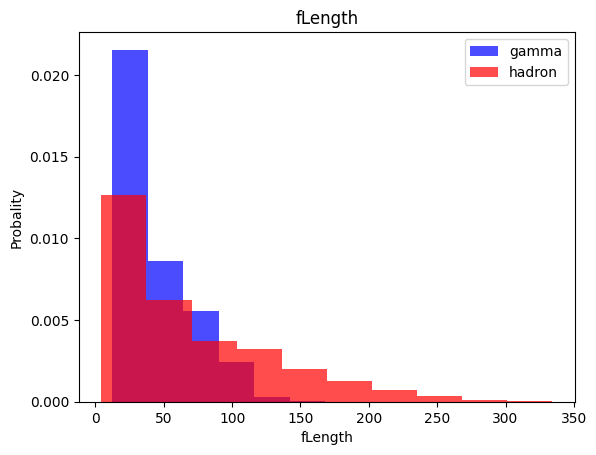

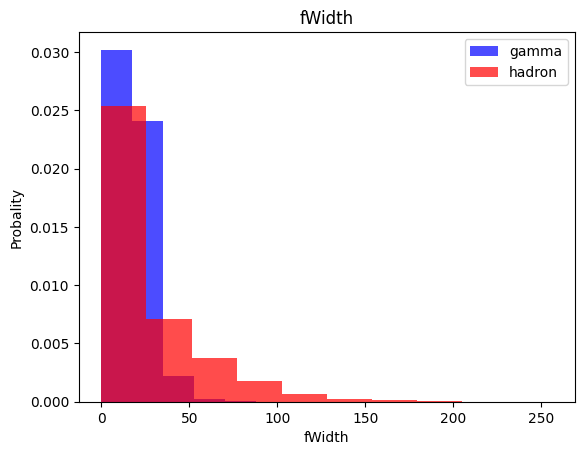

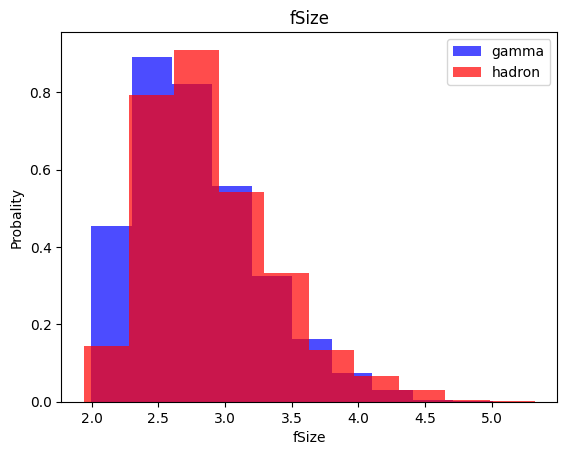

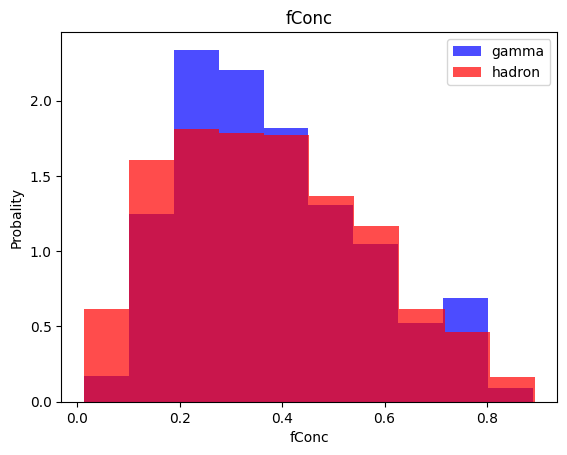

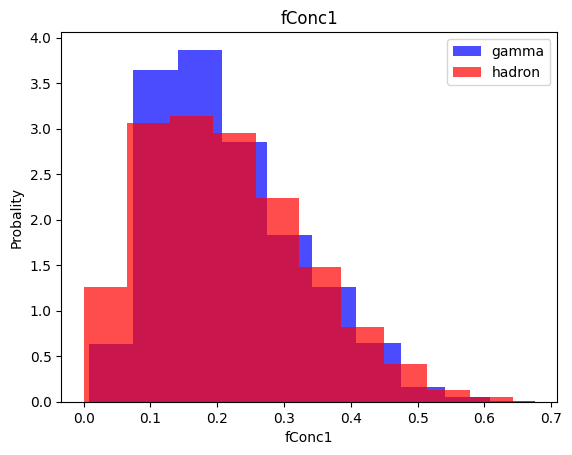

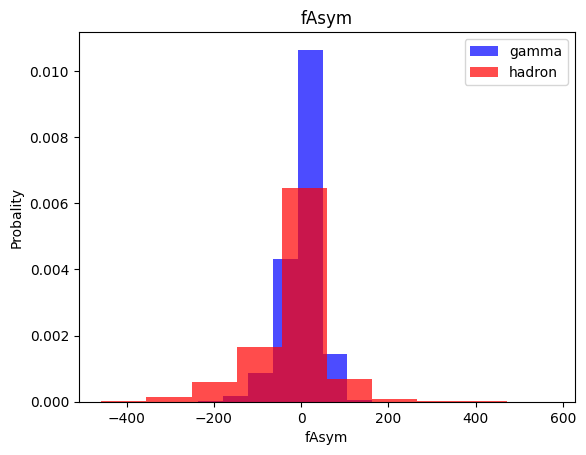

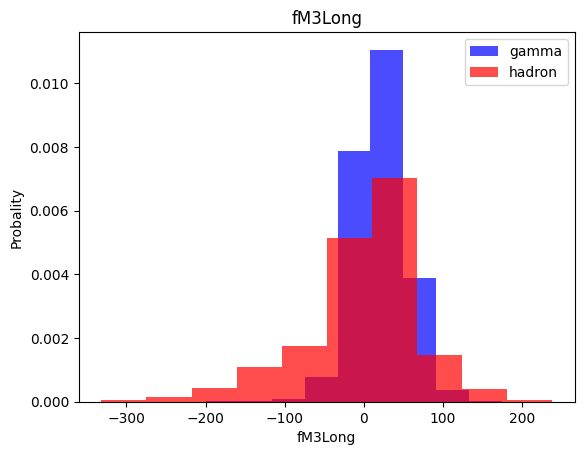

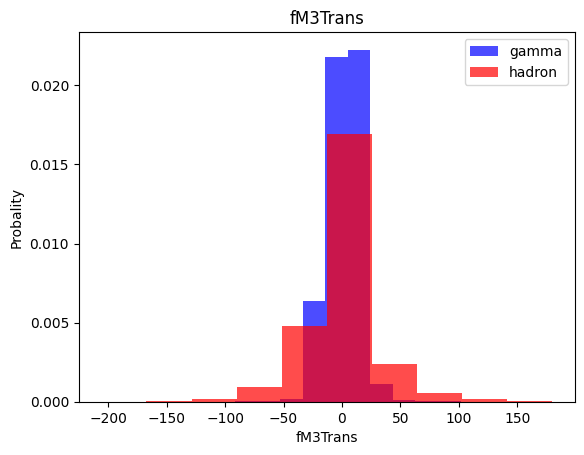

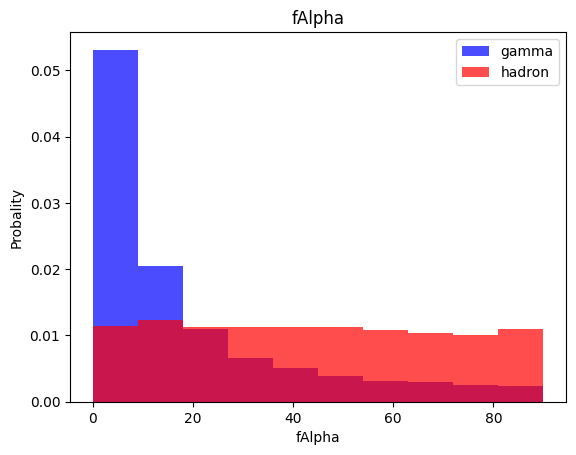

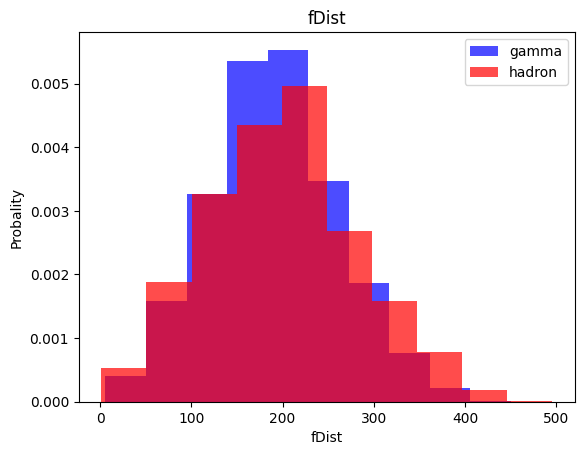

In [ ]:
for label in cols[:-1]:
  plt.hist(df_magic[df_magic["class"]==1][label], color = 'blue', label = 'gamma', alpha =0.7, density= True)
  plt.hist(df_magic[df_magic["class"]==0][label], color = 'red', label = 'hadron', alpha =0.7, density= True)
  plt.title(label)
  plt.ylabel("Probality") # вероятность
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Тренировочная, валидационная и тестовая выборка

In [ ]:
train, valid, test = np.split(df_magic.sample(frac=1), [int(0.6 * len(df_magic)), int(0.8 * len(df_magic))])

60/20/20

In [ ]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  
  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test= scale_dataset(test, oversample = False)

In [ ]:
# проверка баланса датафрейма
len(y_train)
print(sum(y_train == 1))
print(sum(y_train == 0))

7405
7405


#KNN K-Nearest Neighbors (Ближащие соседи)
Оценка с использованием евклидово расстояние до ближащих соседей
d = sqrt(x1- x2)^2 + (y1-y2)^2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1360
           1       0.84      0.85      0.85      2444

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



#Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1360
           1       0.73      0.89      0.80      2444

    accuracy                           0.71      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.71      0.69      3804



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1360
           1       0.84      0.82      0.83      2444

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#(SVM) Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1360
           1       0.89      0.90      0.89      2444

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#NN (Tesorflof)

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)



  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])


  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', 
                 metrics = ['accuracy'])
  
  
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

num_nodes: 16 dropout_prob:0 lr:0.1 batch_size:32


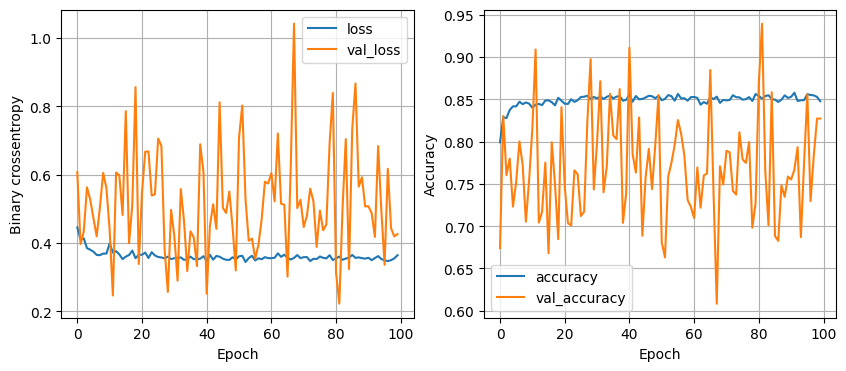

119/119 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8478
num_nodes: 16 dropout_prob:0 lr:0.1 batch_size:64


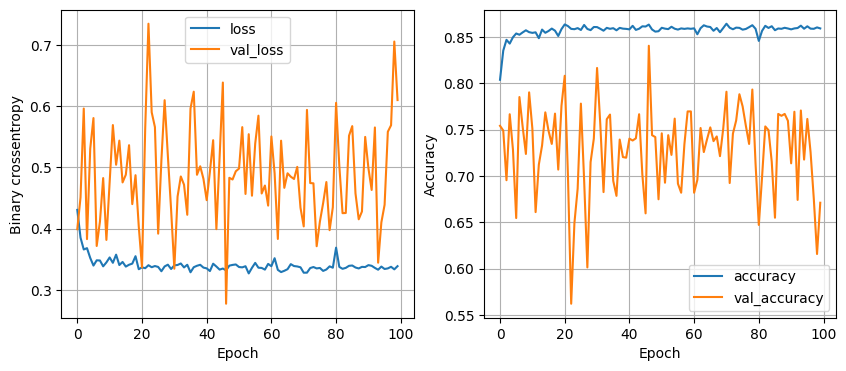

119/119 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8415
num_nodes: 16 dropout_prob:0 lr:0.1 batch_size:128


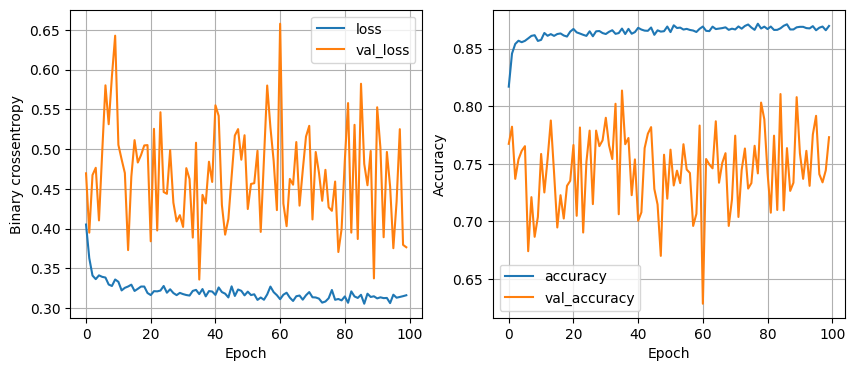

119/119 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8578
num_nodes: 16 dropout_prob:0 lr:0.005 batch_size:32


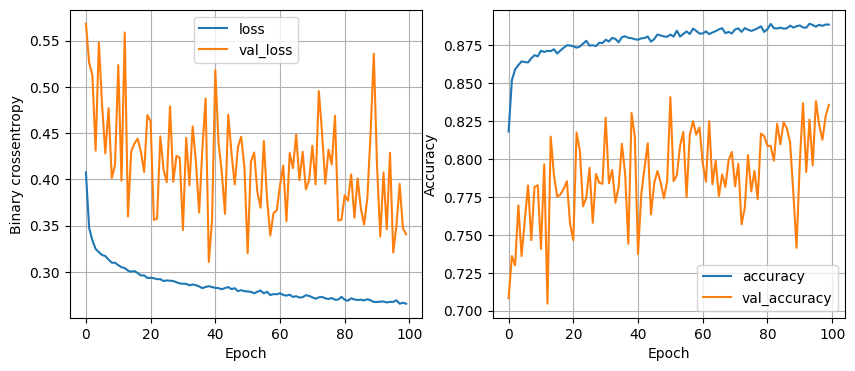

119/119 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8594
num_nodes: 16 dropout_prob:0 lr:0.005 batch_size:64


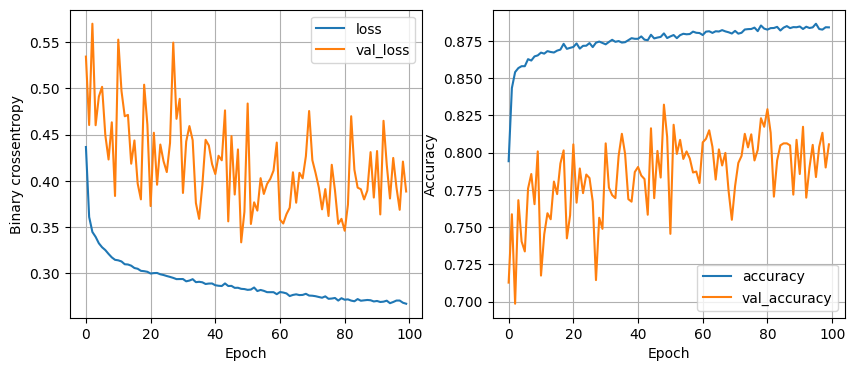

119/119 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8575
num_nodes: 16 dropout_prob:0 lr:0.005 batch_size:128


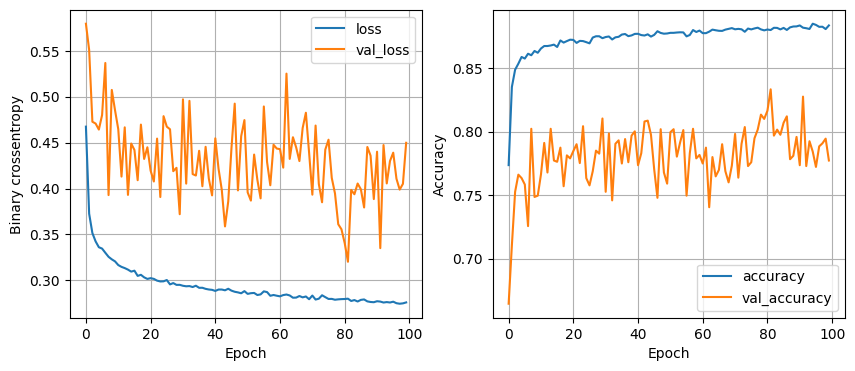

119/119 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8672
num_nodes: 16 dropout_prob:0 lr:0.001 batch_size:32


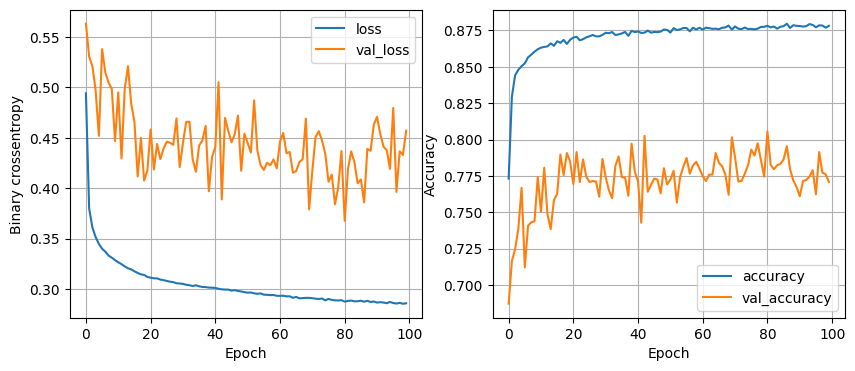

119/119 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8623
num_nodes: 16 dropout_prob:0 lr:0.001 batch_size:64


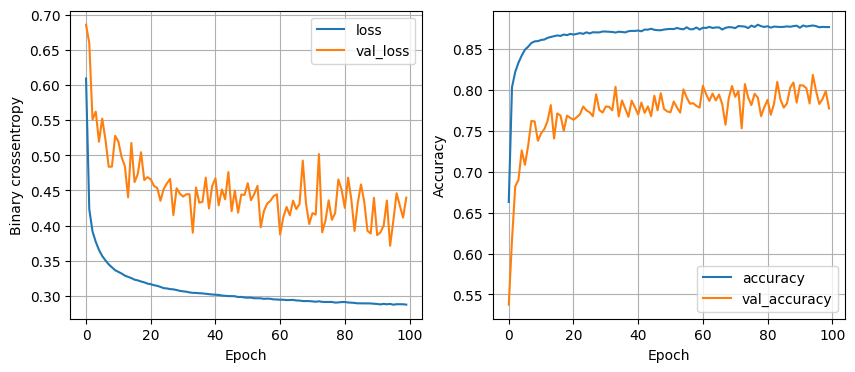

119/119 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.8646
num_nodes: 16 dropout_prob:0 lr:0.001 batch_size:128


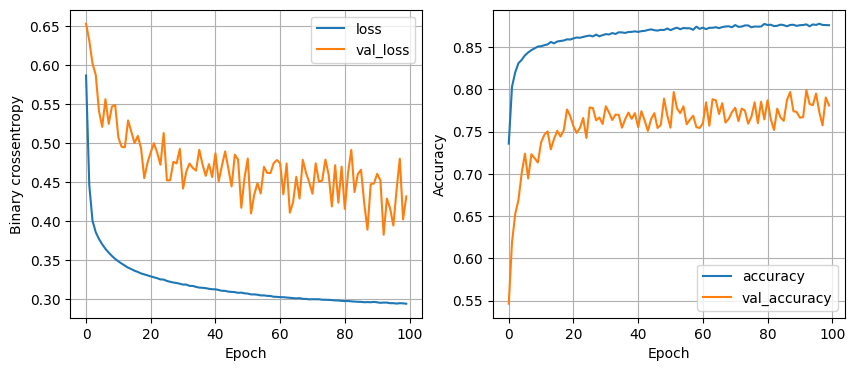

119/119 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8670
num_nodes: 16 dropout_prob:0.2 lr:0.1 batch_size:32


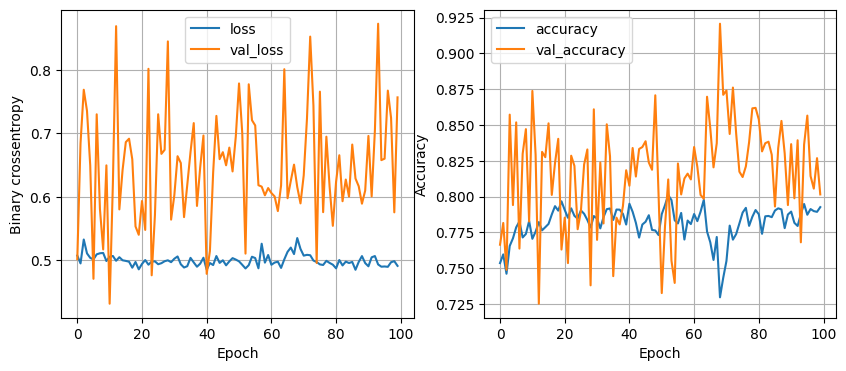

119/119 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8139
num_nodes: 16 dropout_prob:0.2 lr:0.1 batch_size:64


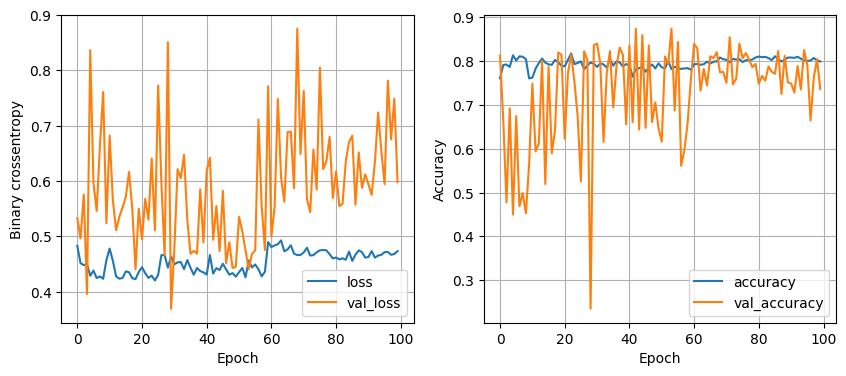

119/119 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8336
num_nodes: 16 dropout_prob:0.2 lr:0.1 batch_size:128


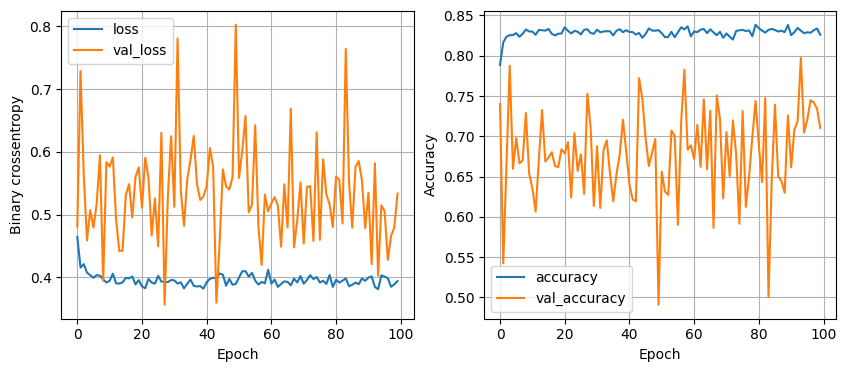

119/119 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.8533
num_nodes: 16 dropout_prob:0.2 lr:0.005 batch_size:32


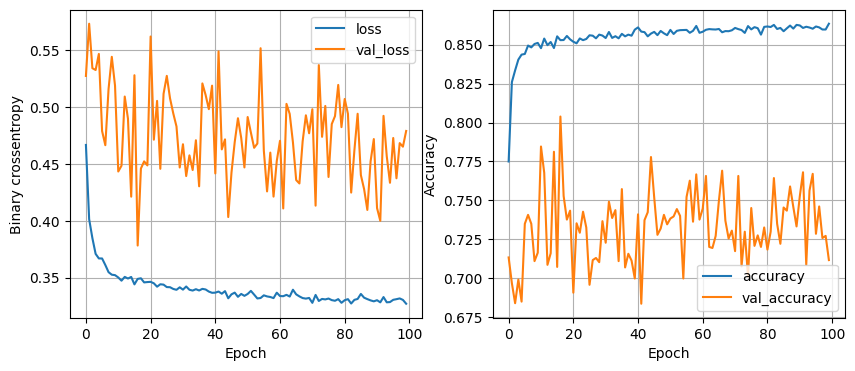

119/119 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8612
num_nodes: 16 dropout_prob:0.2 lr:0.005 batch_size:64


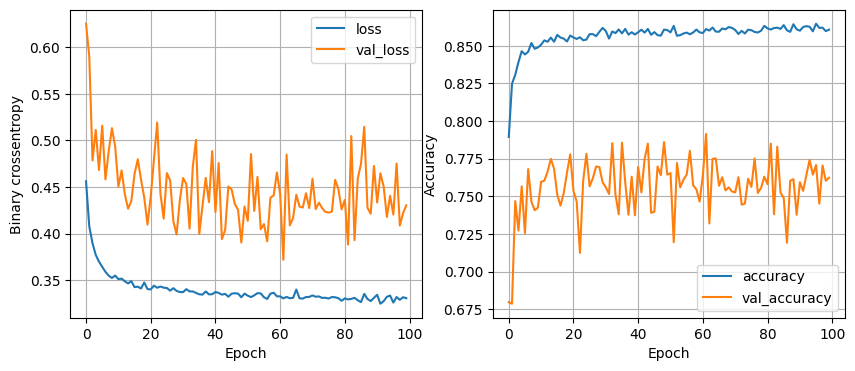

119/119 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8670
num_nodes: 16 dropout_prob:0.2 lr:0.005 batch_size:128


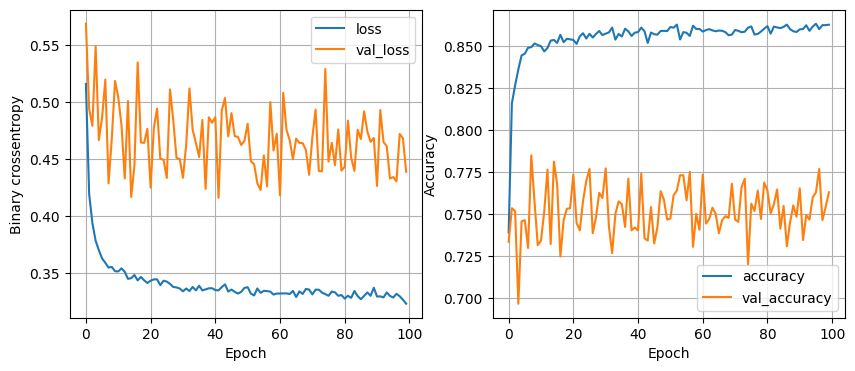

119/119 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8672
num_nodes: 16 dropout_prob:0.2 lr:0.001 batch_size:32


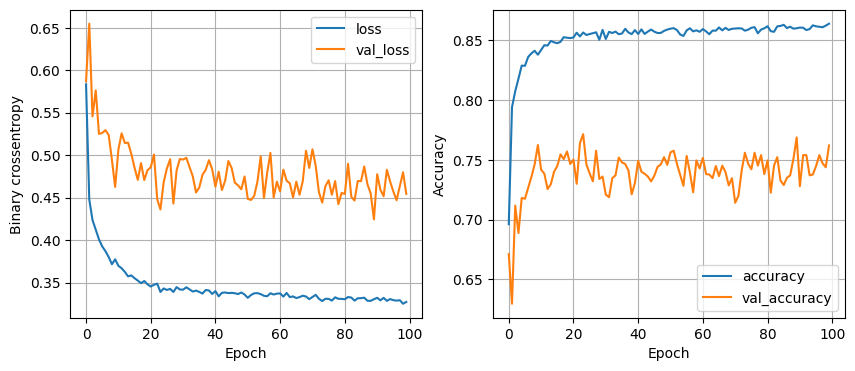

119/119 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8651
num_nodes: 16 dropout_prob:0.2 lr:0.001 batch_size:64


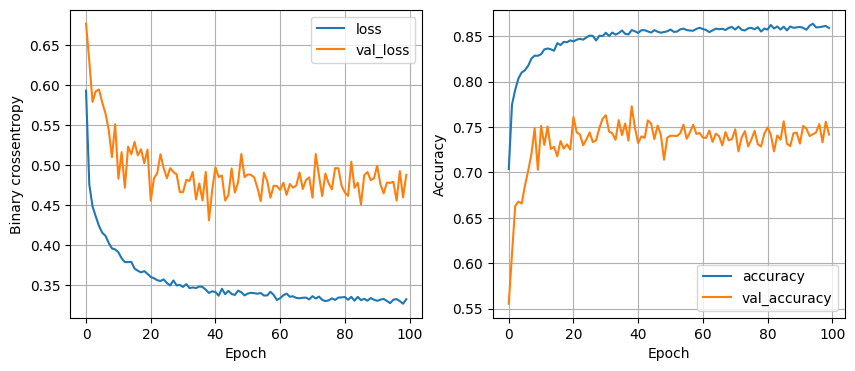

119/119 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8686
num_nodes: 16 dropout_prob:0.2 lr:0.001 batch_size:128


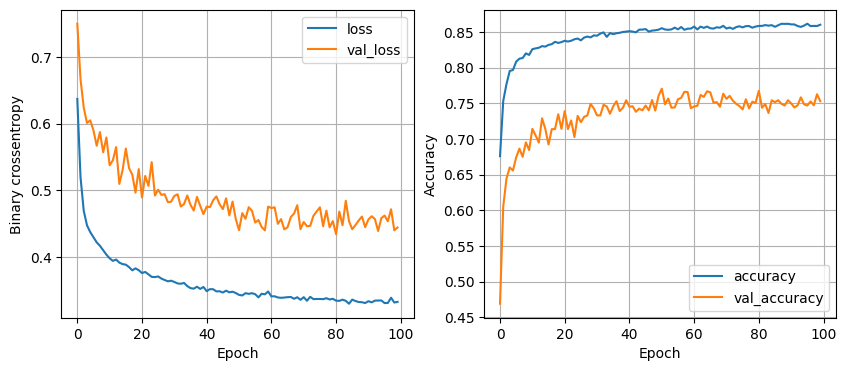

119/119 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8617
num_nodes: 32 dropout_prob:0 lr:0.1 batch_size:32


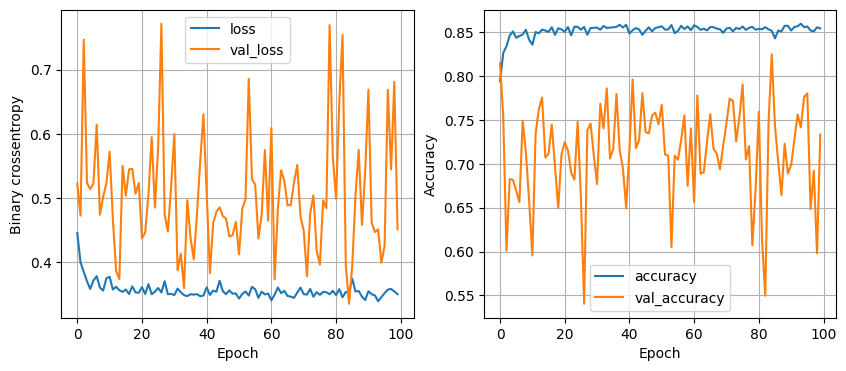

119/119 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8515
num_nodes: 32 dropout_prob:0 lr:0.1 batch_size:64


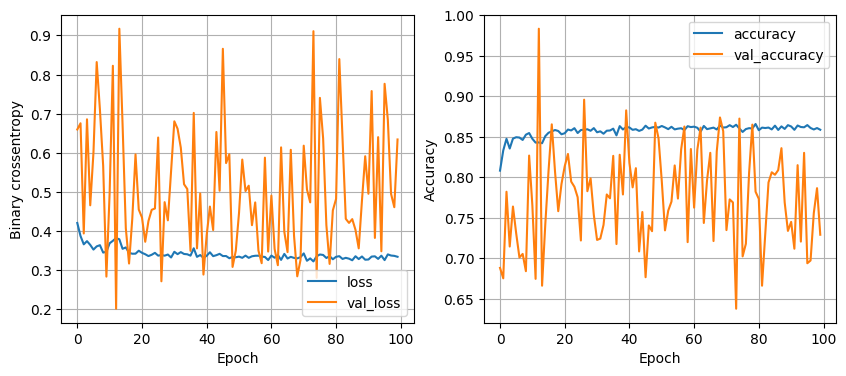

119/119 [==============================] - 0s 3ms/step - loss: 0.3526 - accuracy: 0.8649
num_nodes: 32 dropout_prob:0 lr:0.1 batch_size:128


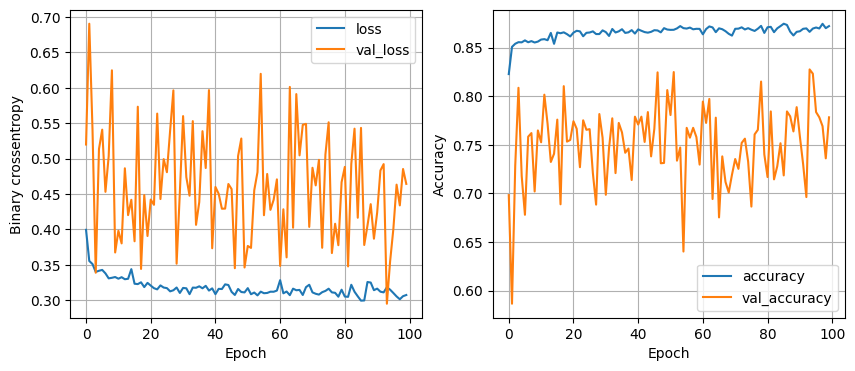

119/119 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8657
num_nodes: 32 dropout_prob:0 lr:0.005 batch_size:32


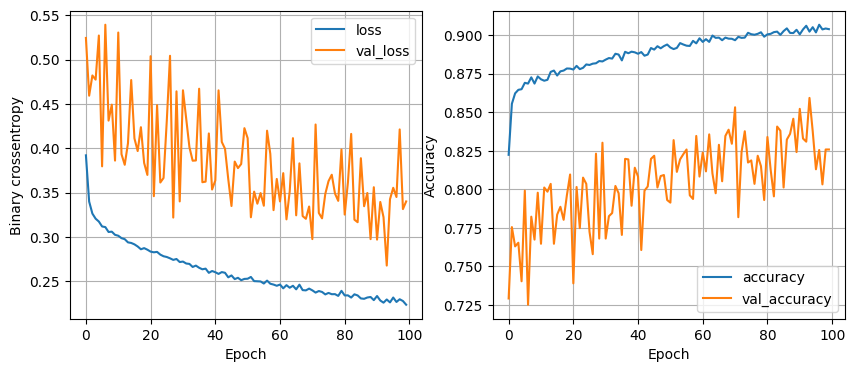

119/119 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.8594
num_nodes: 32 dropout_prob:0 lr:0.005 batch_size:64


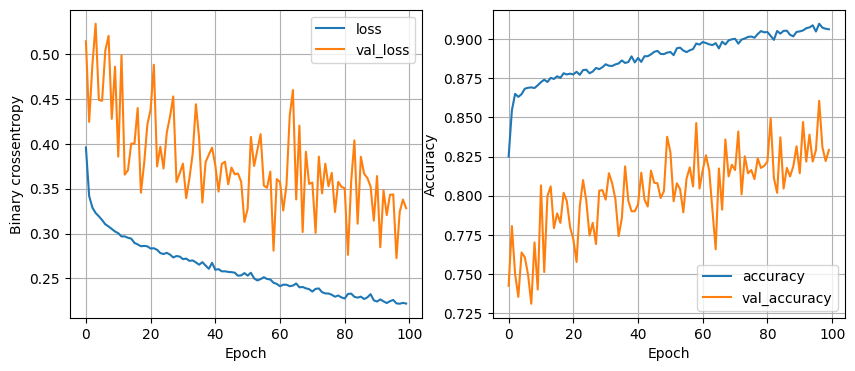

119/119 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.8651
num_nodes: 32 dropout_prob:0 lr:0.005 batch_size:128


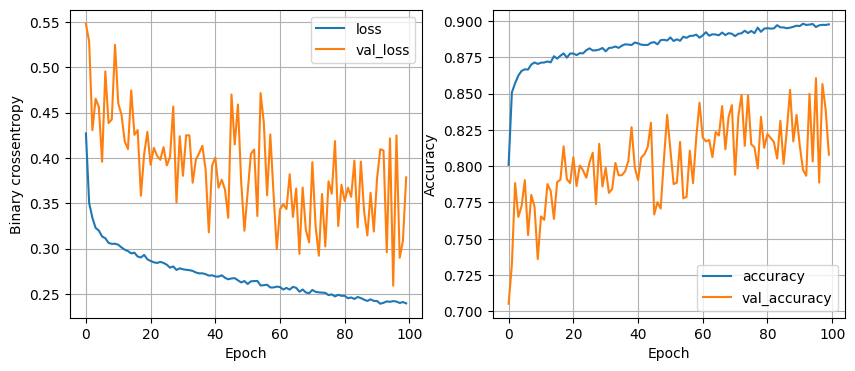

119/119 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.8670
num_nodes: 32 dropout_prob:0 lr:0.001 batch_size:32


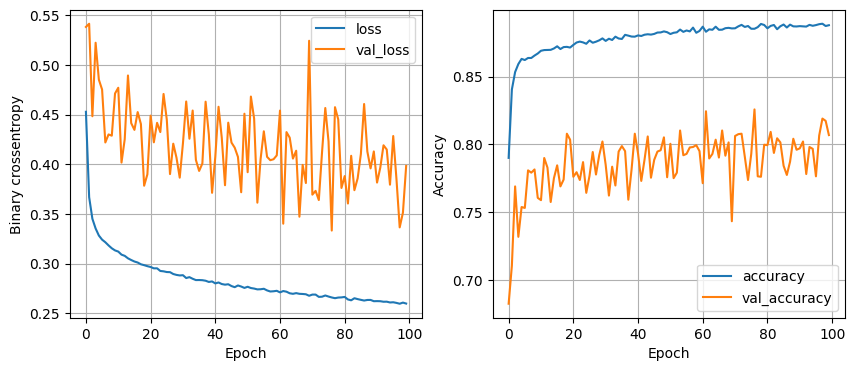

119/119 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8628
num_nodes: 32 dropout_prob:0 lr:0.001 batch_size:64


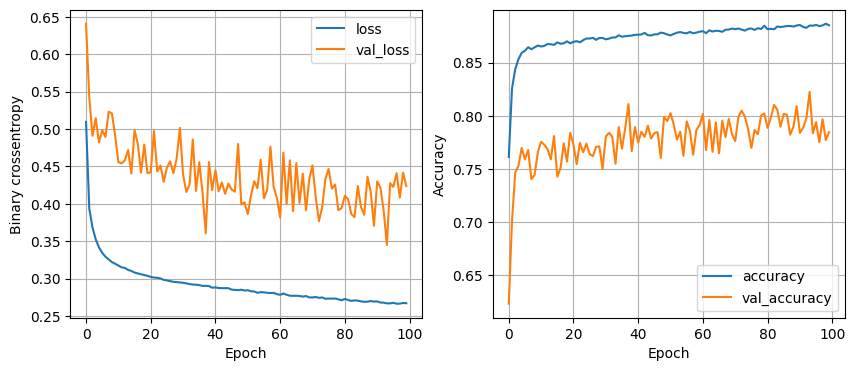

119/119 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8709
num_nodes: 32 dropout_prob:0 lr:0.001 batch_size:128


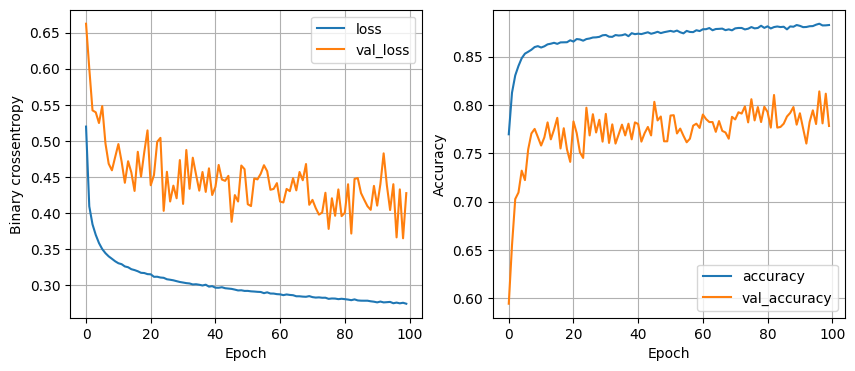

119/119 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8701
num_nodes: 32 dropout_prob:0.2 lr:0.1 batch_size:32


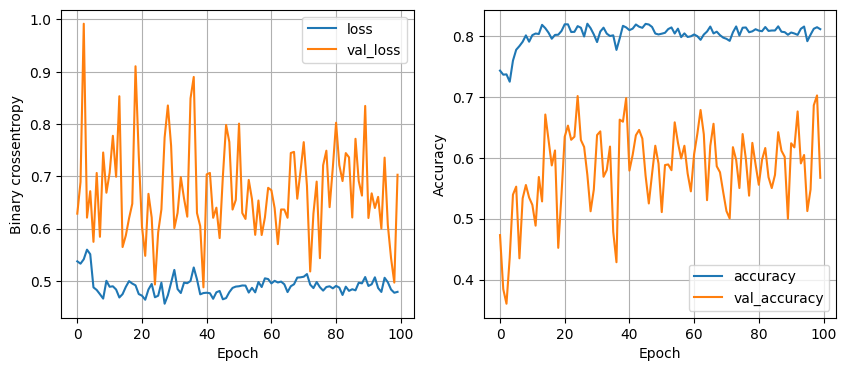

119/119 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8281
num_nodes: 32 dropout_prob:0.2 lr:0.1 batch_size:64


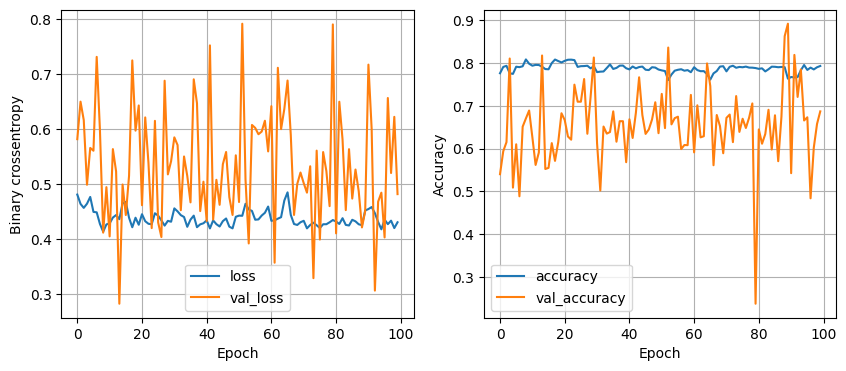

119/119 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8507
num_nodes: 32 dropout_prob:0.2 lr:0.1 batch_size:128


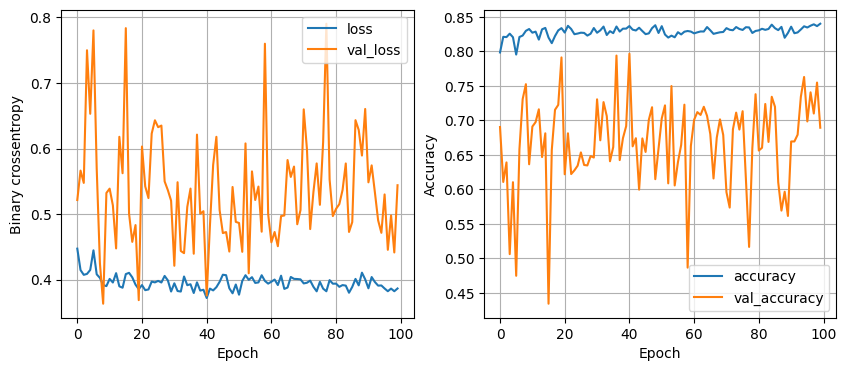

119/119 [==============================] - 0s 3ms/step - loss: 0.3595 - accuracy: 0.8557
num_nodes: 32 dropout_prob:0.2 lr:0.005 batch_size:32


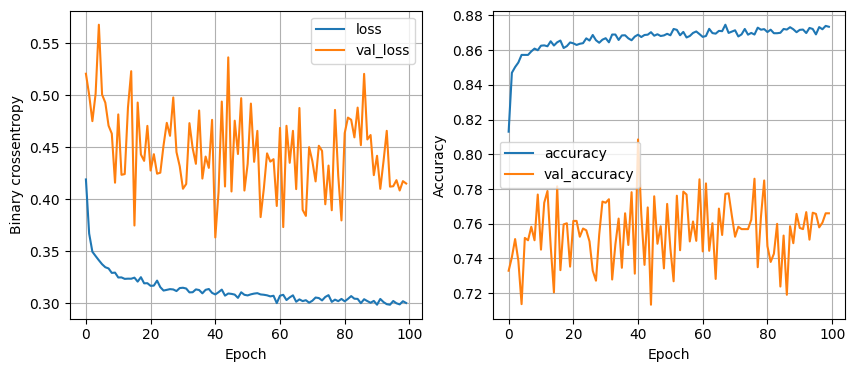

119/119 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8699
num_nodes: 32 dropout_prob:0.2 lr:0.005 batch_size:64


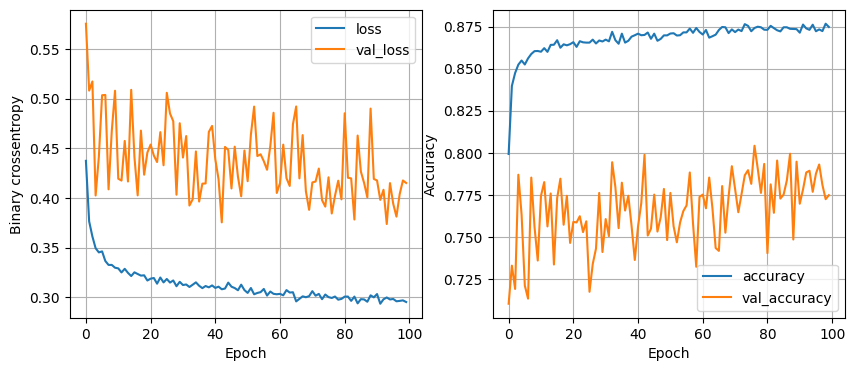

119/119 [==============================] - 1s 4ms/step - loss: 0.3220 - accuracy: 0.8717
num_nodes: 32 dropout_prob:0.2 lr:0.005 batch_size:128


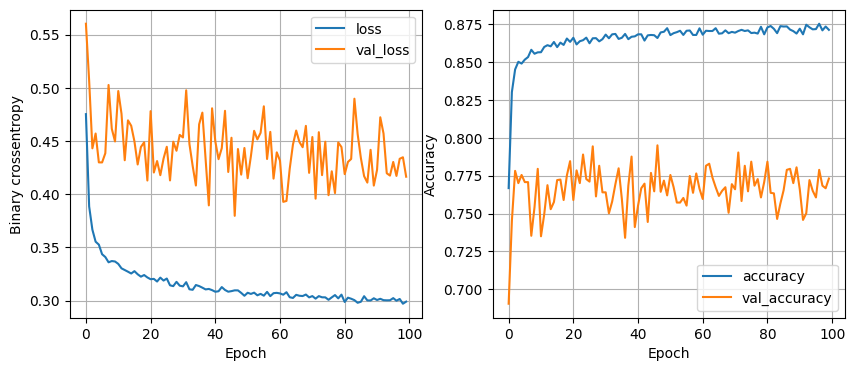

119/119 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8707
num_nodes: 32 dropout_prob:0.2 lr:0.001 batch_size:32


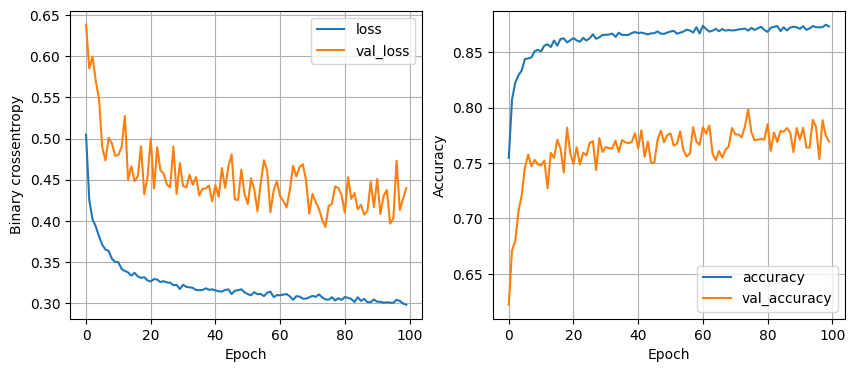

119/119 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8662
num_nodes: 32 dropout_prob:0.2 lr:0.001 batch_size:64


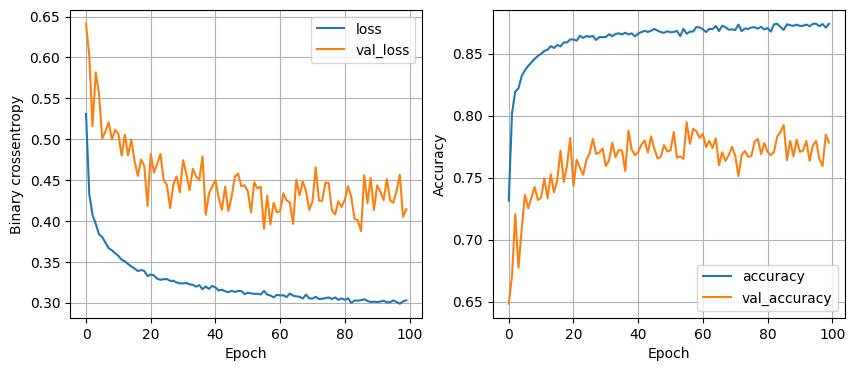

119/119 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.8680
num_nodes: 32 dropout_prob:0.2 lr:0.001 batch_size:128


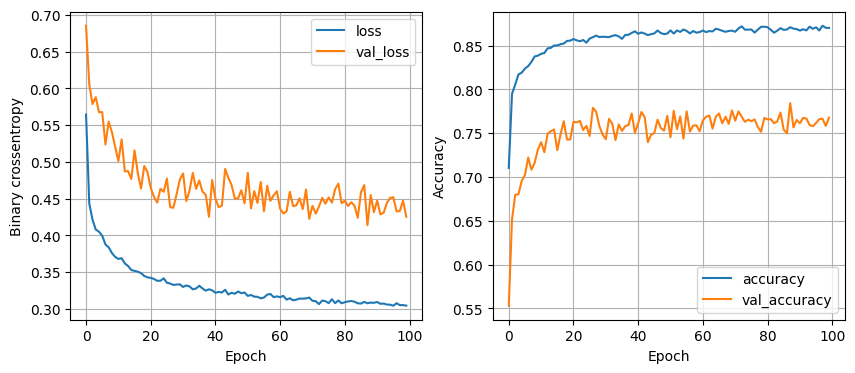

119/119 [==============================] - 1s 4ms/step - loss: 0.3193 - accuracy: 0.8657
num_nodes: 64 dropout_prob:0 lr:0.1 batch_size:32


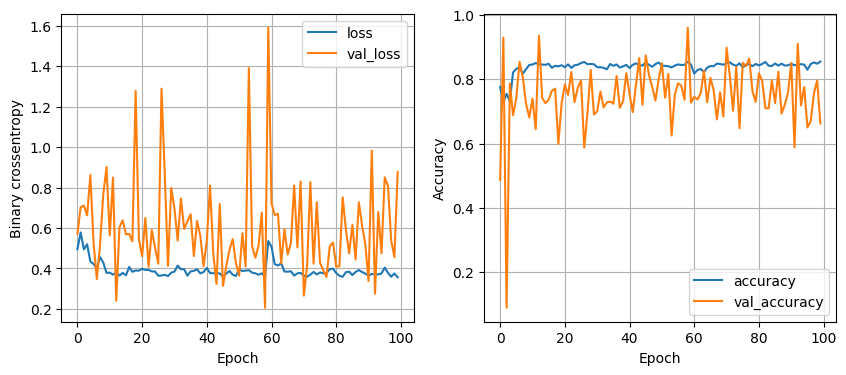

119/119 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8502
num_nodes: 64 dropout_prob:0 lr:0.1 batch_size:64


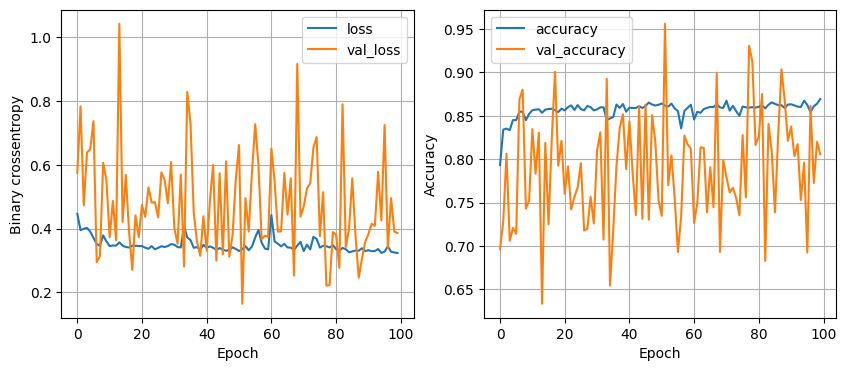

119/119 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8528
num_nodes: 64 dropout_prob:0 lr:0.1 batch_size:128


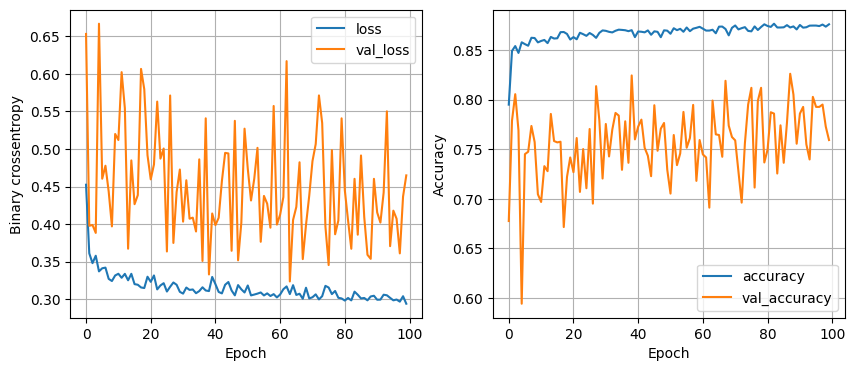

119/119 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8623
num_nodes: 64 dropout_prob:0 lr:0.005 batch_size:32


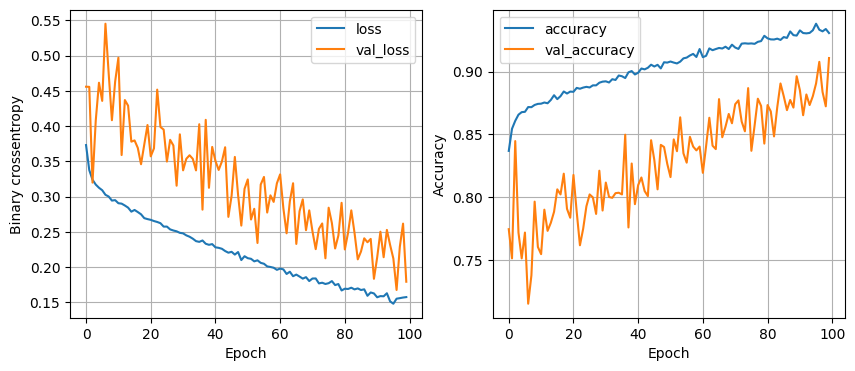

119/119 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.8504
num_nodes: 64 dropout_prob:0 lr:0.005 batch_size:64


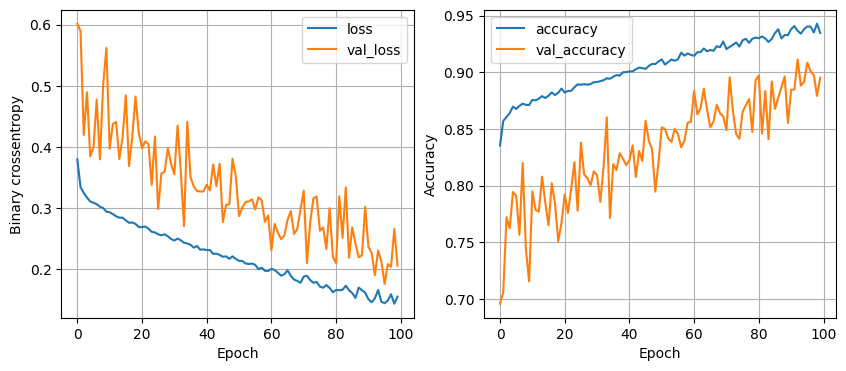

119/119 [==============================] - 1s 4ms/step - loss: 0.6559 - accuracy: 0.8520
num_nodes: 64 dropout_prob:0 lr:0.005 batch_size:128


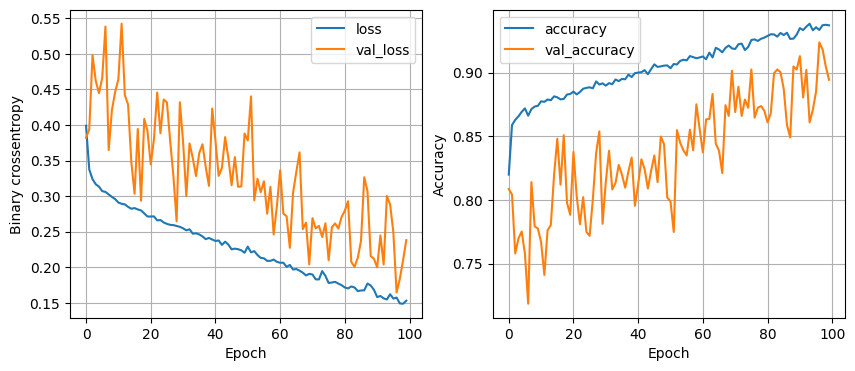

119/119 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.8509
num_nodes: 64 dropout_prob:0 lr:0.001 batch_size:32


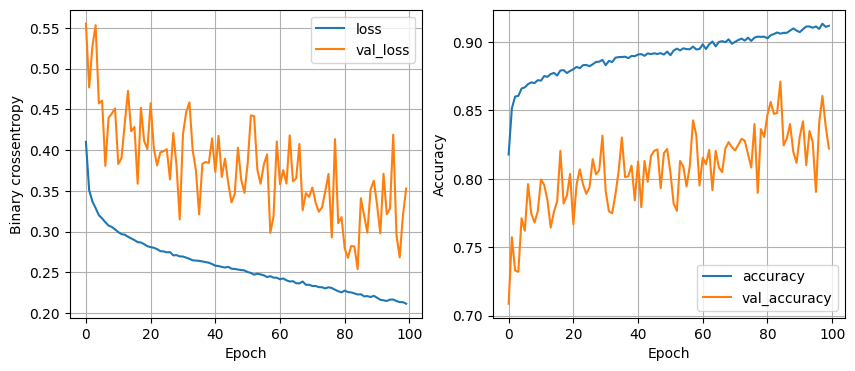

119/119 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8651
num_nodes: 64 dropout_prob:0 lr:0.001 batch_size:64


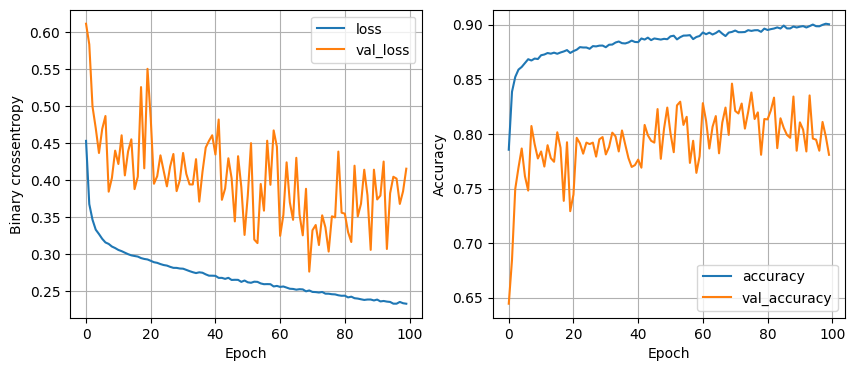

119/119 [==============================] - 1s 4ms/step - loss: 0.3480 - accuracy: 0.8733
num_nodes: 64 dropout_prob:0 lr:0.001 batch_size:128


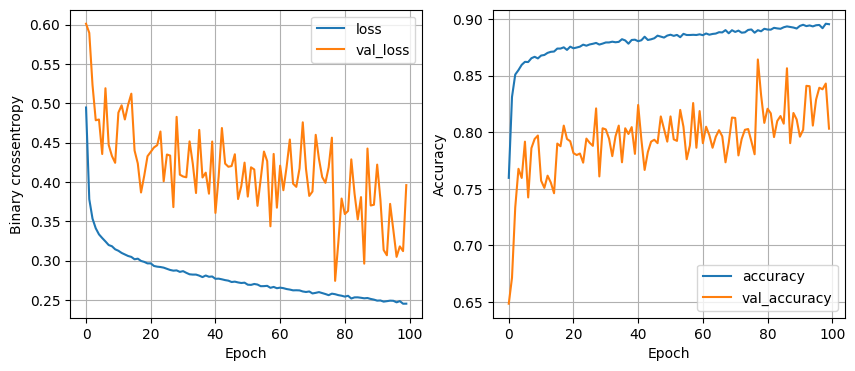

119/119 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8701
num_nodes: 64 dropout_prob:0.2 lr:0.1 batch_size:32


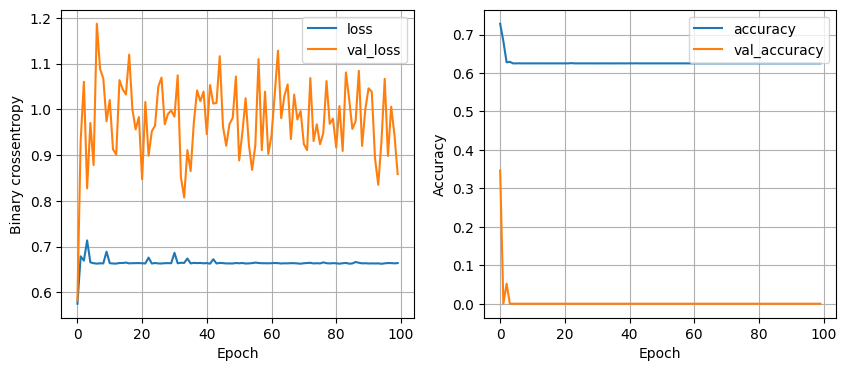

119/119 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6632
num_nodes: 64 dropout_prob:0.2 lr:0.1 batch_size:64


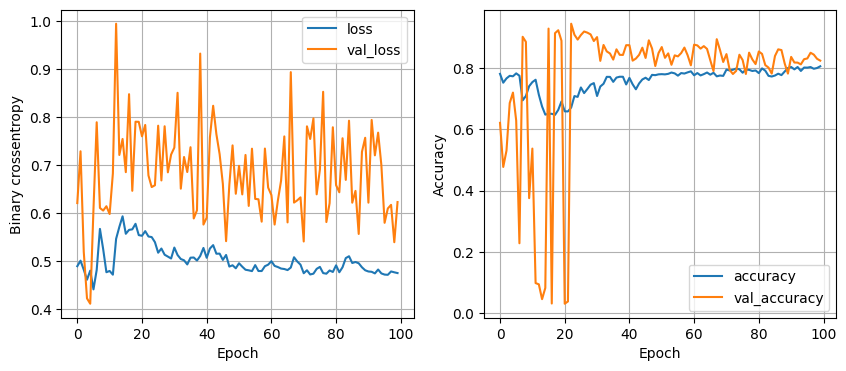

119/119 [==============================] - 1s 4ms/step - loss: 0.4284 - accuracy: 0.8186
num_nodes: 64 dropout_prob:0.2 lr:0.1 batch_size:128


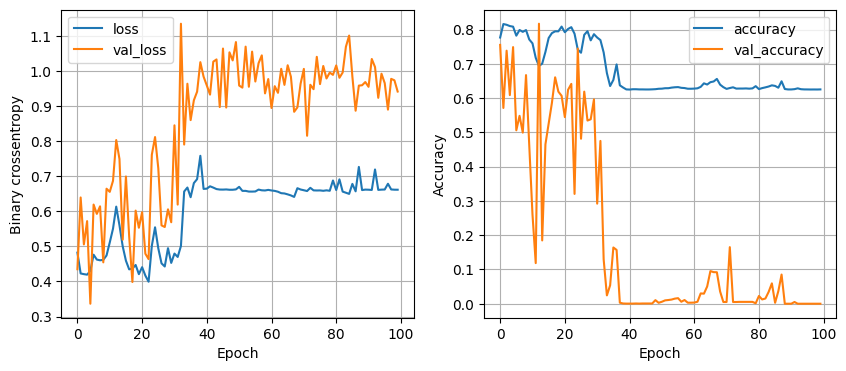

119/119 [==============================] - 0s 3ms/step - loss: 0.6449 - accuracy: 0.6632
num_nodes: 64 dropout_prob:0.2 lr:0.005 batch_size:32


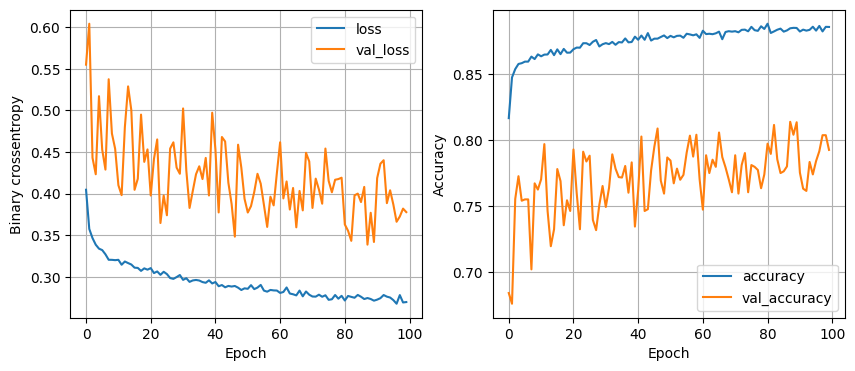

119/119 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8728
num_nodes: 64 dropout_prob:0.2 lr:0.005 batch_size:64


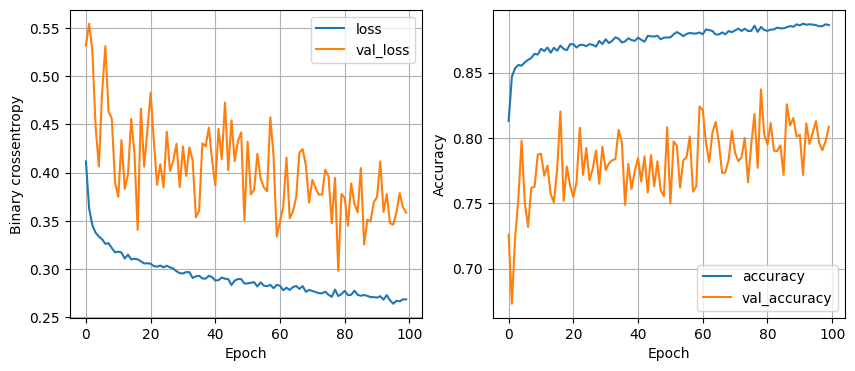

119/119 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8680
num_nodes: 64 dropout_prob:0.2 lr:0.005 batch_size:128


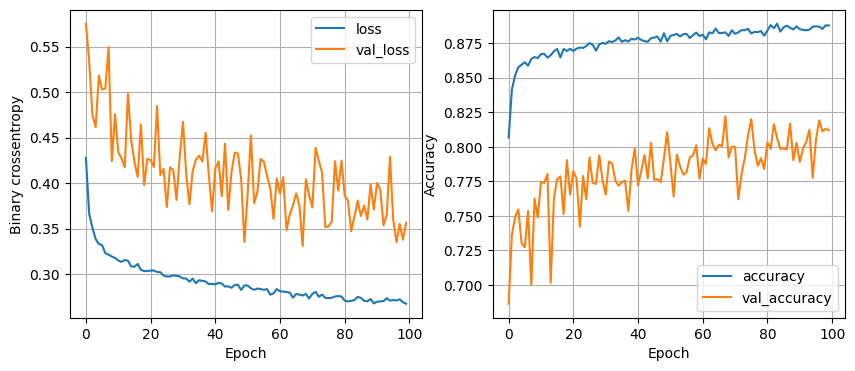

119/119 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8738
num_nodes: 64 dropout_prob:0.2 lr:0.001 batch_size:32


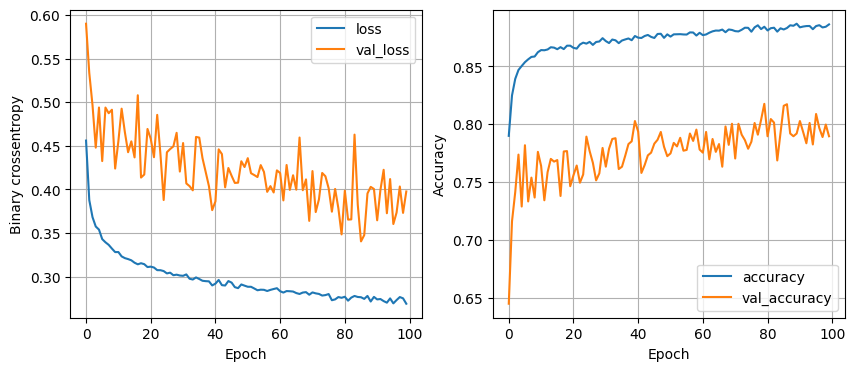

119/119 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8720
num_nodes: 64 dropout_prob:0.2 lr:0.001 batch_size:64


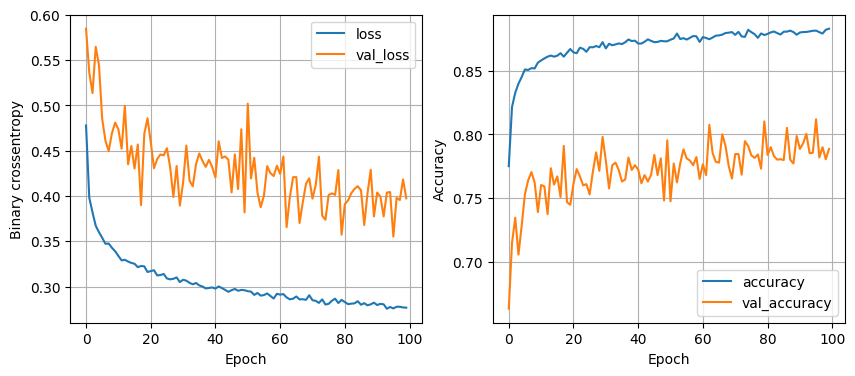

119/119 [==============================] - 0s 3ms/step - loss: 0.3217 - accuracy: 0.8709
num_nodes: 64 dropout_prob:0.2 lr:0.001 batch_size:128


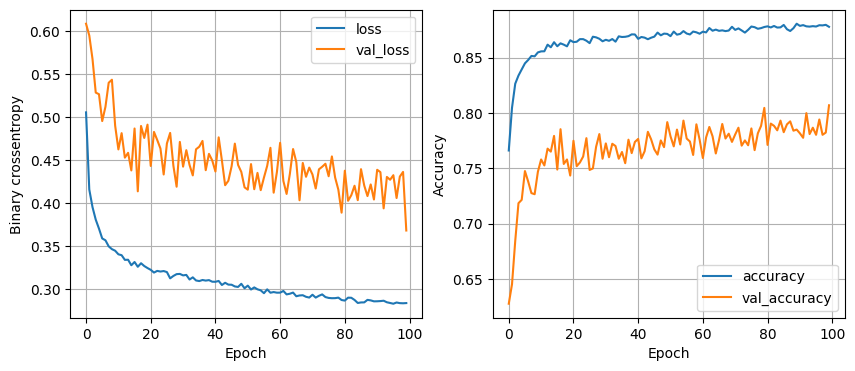

119/119 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8733


In [ ]:
least_val_loss = float('inf')
leaf_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32,64, 128]:
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        print('num_nodes: ' + str(num_nodes) + " dropout_prob:" + str(dropout_prob) + " lr:" + str(lr) + " batch_size:" + str(batch_size))
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss

          leaf_loss_model = model

result_model = leaf_loss_model

In [ ]:
from sklearn.metrics import classification_report
y_pred = result_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

119/119 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1400
           1       0.87      0.95      0.91      2404

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

